

>cs4014



# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [81]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential(  
          [
           keras.layers.Conv2D(filters = 64, kernel_size= (3,3), input_shape = (28,28,1), activation="relu", name="layer1"),
           keras.layers.MaxPooling2D((2,2), strides= None, name = "layer2"),
           keras.layers.Conv2D(filters= 32, kernel_size = (3,3),  activation= "relu", name= "layer3"),
           keras.layers.MaxPooling2D((2,2), strides= None, name = "layer4"),
           keras.layers.Dropout(0.25),
           keras.layers.Flatten(),
           keras.layers.Dense(26, activation="softmax", name="dense_1"),
           ] 
        ) 
        model.summary()  
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        images= normalize(images)
        #labels= normalize(labels)
        #im2= np.empty(shape=images.shape)
        #for i in range(0, images.shape[0]):
          #np.append(im2, np.reshape(images[i], (28,28,1)))
          #images[i]= np.reshape(images[i],(28,28,1))
        images = images.reshape(images.shape[0],28,28,1)
        labels=to_categorical(labels, 26)
        # TODO : split into training and validation set
          #using 30% of the data to form the validation set
        im_train, im_test, label_train, label_test = train_test_split(images, labels, test_size=0.3, random_state=1)
        # TODO : reshape each example into a 2D image (28, 28, 1)
        
        self.data = {
            "train": (im_train, label_train), # (x_train, y_train)
            "test" : (im_test, label_test), # (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        
        print(self.data['train'][0].shape)
        print(self.data['train'][1].shape)
        history = self.model.fit(x=self.data['train'][0],y=self.data['train'][1], batch_size = batch_size, epochs= epochs, verbose=verbose, validation_data = self.data['test'])
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        data = normalize(data)
        data = data.reshape(data.shape[0],28,28,1)
        # self.model.predict() and np.argmax( , axis=1) might help
        labels = self.model.predict(data)
        labels = np.argmax(labels, axis=1)
        return labels
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [82]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [83]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 layer2 (MaxPooling2D)       (None, 13, 13, 64)        0         
                                                                 
 layer3 (Conv2D)             (None, 11, 11, 32)        18464     
                                                                 
 layer4 (MaxPooling2D)       (None, 5, 5, 32)          0         
                                                                 
 dropout_13 (Dropout)        (None, 5, 5, 32)          0         
                                                                 
 flatten_15 (Flatten)        (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 26)              

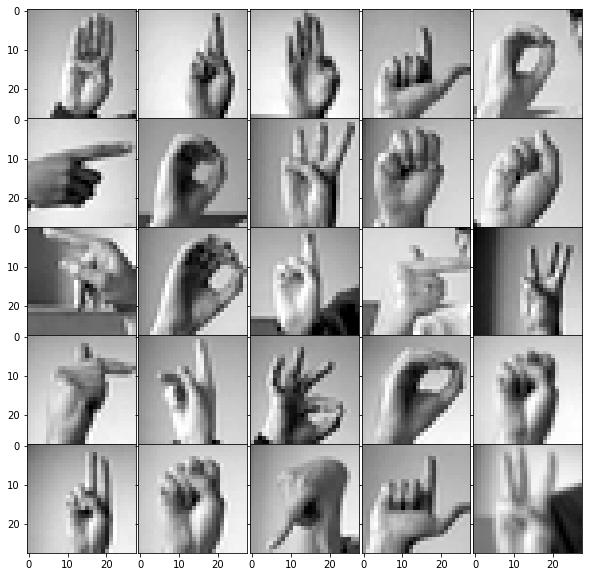

In [ ]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

(19218, 28, 28, 1)
(19218, 26)
Epoch 1/30
151/151 [==============================] - 2s 8ms/step - loss: 3.0590 - accuracy: 0.1073 - val_loss: 2.2941 - val_accuracy: 0.3286
Epoch 2/30
151/151 [==============================] - 1s 7ms/step - loss: 1.6824 - accuracy: 0.4961 - val_loss: 1.2468 - val_accuracy: 0.6484
Epoch 3/30
151/151 [==============================] - 1s 7ms/step - loss: 1.1638 - accuracy: 0.6433 - val_loss: 0.9273 - val_accuracy: 0.7347
Epoch 4/30
151/151 [==============================] - 1s 8ms/step - loss: 0.9390 - accuracy: 0.7111 - val_loss: 0.7515 - val_accuracy: 0.7746
Epoch 5/30
151/151 [==============================] - 1s 7ms/step - loss: 0.7849 - accuracy: 0.7569 - val_loss: 0.6087 - val_accuracy: 0.8294
Epoch 6/30
151/151 [==============================] - 1s 7ms/step - loss: 0.6661 - accuracy: 0.7914 - val_loss: 0.5109 - val_accuracy: 0.8560
Epoch 7/30
151/151 [==============================] - 1s 7ms/step - loss: 0.5884 - accuracy: 0.8110 - val_loss: 0.430

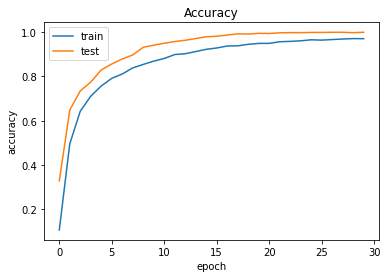

In [84]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [85]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 0s 2ms/step
0.9065811489124372
